### Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import sys
from pathlib import Path
import datetime
import os
sys.path.append('../ReadLogFiles/')
from SlowControls import SlowControls

### Create lists of datasets and column maps

In [2]:
# define the folder containing slow controls data files and sort the files
dirpath = '../LogFiles/'

# best to put files in order they were written in case the column map changed at one point
paths = sorted(Path(dirpath).iterdir(), key=os.path.getmtime)
datasets = []
for path in paths:
    if str(path)[-4:]=='.dat':
        print(str(path))
        datasets.append(str(path))

# open column maps
with open('../ColumnMaps/colmap_v1.yml','r') as infile:
    colmap_v1 = yaml.safe_load(infile)
    
with open('../ColumnMaps/colmap_v2.yml','r') as infile:
    colmap_v2 = yaml.safe_load(infile)

../LogFiles/LS_20220318_133442.dat
../LogFiles/LS_20220318_133558.dat
../LogFiles/LS_20220318_134451.dat
../LogFiles/LS_20220321_115015.dat
../LogFiles/LS_20220321_132314.dat
../LogFiles/LS_20220321_132639.dat
../LogFiles/LS_20220321_134149.dat
../LogFiles/LS_20220321_140108.dat
../LogFiles/LS_20220321_140304.dat
../LogFiles/LS_20220321_140610.dat
../LogFiles/LS_20220321_175512.dat
../LogFiles/LS_20220322_112305.dat
../LogFiles/LS_20220322_114143.dat
../LogFiles/LS_20220322_120139.dat
../LogFiles/LS_20220322_140351.dat
../LogFiles/LS_20220322_143424.dat


### Create `SlowControls` object to store data

In [3]:
SC = SlowControls(datasets,indices=colmap_v1['indices'],labels=colmap_v1['labels'])

# save it so we don't have to reload it next time
SC.SaveDataframe('dataframe.pkl')

# try reloading it to verify it works, then delete it
#SC = SlowControls()
#SC.LoadDataframe('dataframe.pkl')
#SC.PrintHead()


Opening dataset in ../LogFiles/LS_20220318_133442.dat...


Processing lines...: 12it [00:00, 543.13it/s]



Opening dataset in ../LogFiles/LS_20220318_133558.dat...


Processing lines...: 85it [00:00, 537.73it/s]



Opening dataset in ../LogFiles/LS_20220318_134451.dat...


Processing lines...: 66it [00:00, 567.57it/s]



Opening dataset in ../LogFiles/LS_20220321_115015.dat...


Processing lines...: 105it [00:00, 372.97it/s]



Opening dataset in ../LogFiles/LS_20220321_132314.dat...


Processing lines...: 28it [00:00, 494.53it/s]



Opening dataset in ../LogFiles/LS_20220321_132639.dat...


Processing lines...: 49it [00:00, 638.45it/s]



Opening dataset in ../LogFiles/LS_20220321_134149.dat...


Processing lines...: 9it [00:00, 283.01it/s]



Opening dataset in ../LogFiles/LS_20220321_140108.dat...


Processing lines...: 20it [00:00, 322.22it/s]



Opening dataset in ../LogFiles/LS_20220321_140304.dat...


Processing lines...: 28it [00:00, 602.37it/s]



Opening dataset in ../LogFiles/LS_20220321_140610.dat...


Processing lines...: 226it [00:00, 595.33it/s]



Opening dataset in ../LogFiles/LS_20220321_175512.dat...


Processing lines...: 6232it [00:08, 723.38it/s]



Opening dataset in ../LogFiles/LS_20220322_112305.dat...


Processing lines...: 273it [00:00, 842.85it/s]



Opening dataset in ../LogFiles/LS_20220322_114143.dat...


Processing lines...: 262it [00:00, 673.17it/s]



Opening dataset in ../LogFiles/LS_20220322_120139.dat...


Processing lines...: 10it [00:00, 467.16it/s]



Opening dataset in ../LogFiles/LS_20220322_140351.dat...


Processing lines...: 39it [00:00, 811.72it/s]



Opening dataset in ../LogFiles/LS_20220322_143424.dat...


Processing lines...: 0it [00:00, ?it/s]


previous file ../LogFiles/LS_20220322_140351.dat had 44 columns.
These should be loaded separately with separate column maps. Aborting...

Found 7444 readings between 03/18/2022 13:34:42 and 03/22/2022 14:10:42.

Sorting by date...

Created pandas dataframe containing slow controls data.

Time: 11.642 seconds.

Dataframe saved to dataframe.pkl


### Take a look at what data is available

In [4]:
SC.PrintDataFormat()
SC.PrintHead()

index: 0, quantity: date
index: 1, quantity: T_Cu_bottom
index: 2, quantity: T_cell_top
index: 3, quantity: T_cell_mid
index: 4, quantity: T_cell_bottom
index: 5, quantity: T_Cu_top
index: 6, quantity: T_ambient
index: 7, quantity: T_in
index: 8, quantity: T_top_flange
index: 10, quantity: T_set_min
index: 11, quantity: T_set_max
index: 21, quantity: mass_flow
index: 22, quantity: P_XP3
index: 23, quantity: P_XP5
index: 24, quantity: P_CCG
index: 35, quantity: cool_on
index: 38, quantity: water_flow
index: 39, quantity: coi_in_temp
index: 40, quantity: water_temp
index: 41, quantity: fridge_CT
index: 42, quantity: discharge_pressure
index: 43, quantity: suction_pressure

           date  T_Cu_bottom  T_cell_top  T_cell_mid  T_cell_bottom  T_Cu_top  \
1  1.647636e+09      292.229     292.374     292.090            0.0   292.051   
1  1.647636e+09      292.233     292.345     292.090            0.0   292.044   
1  1.647636e+09      292.229     292.350     292.086            0.0   292.044

### Demostration of some tools for making quick plots

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'CCG pressure'}, xlabel='Time (hours)', ylabel='P (torr)'>)

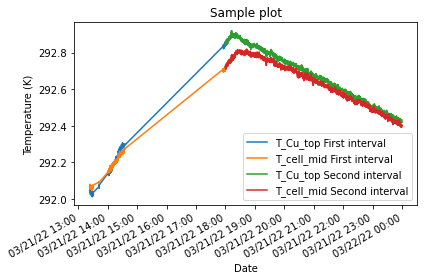

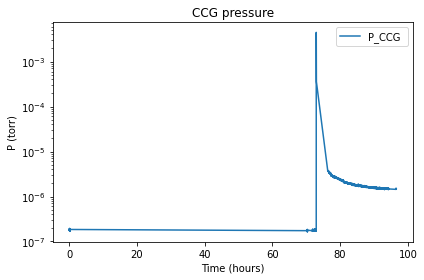

In [5]:
# choose start and end dates for plotting
# can either be lists of dates to plot over multiple intervals
# or just a single start and end date
start_date = [datetime.datetime(2022,3,21,12),datetime.datetime(2022,3,21,18)]
end_date = [datetime.datetime(2022,3,21,20),datetime.datetime(2022,3,22,0)]

# can also just use the whole date range
start_date2,end_date2 = SC.GetTimeBounds()

# plot vs calendar date
SC.PlotVsDate(['T_Cu_top','T_cell_mid'],start_date,end_date,\
              labels=['First interval','Second interval'],\
              title='Sample plot',ylabel='Temperature (K)')

# or plot vs start time
SC.PlotVsTime('P_CCG',start_date2,end_date2,title='CCG pressure',ylabel='P (torr)',semilogy=True)

### Can also get data as arrays for more freedom with plotting

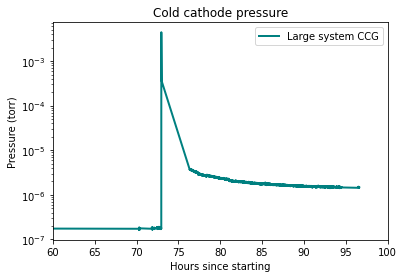

In [11]:
# get data in arrays
P_CCG = SC.GetQuantityArray('P_CCG',start_date2,end_date2)
dates = SC.GetHoursArray(start_date2,end_date2)

# make a plot using arrays
plt.semilogy(dates,P_CCG,color='teal',lw=2,label='Large system CCG')
plt.xlabel('Hours since starting')
plt.ylabel('Pressure (torr)')
plt.title('Cold cathode pressure')
plt.xlim([60,100])
plt.legend(loc='best')
plt.show()